# ME 581 HW 4
Yi Yang @ (yang1087@purdue.edu), all rights reserved.

## Problem 1
Let $x_0 = -3$, $x_1 = 0$, $x_2 = e$, and $x_3 = \pi$.

(a) Determine formulas for the Lagrange polynomials $L_{3,0}(x), L_{3,1}(x), L_{3,2}(x), L_{3,3}(x)$ associated with the given interpolating points.

(b) Plot $L_{3,0}(x), L_{3,1}(x), L_{3,2}(x)$, and $L_{3,3}(x)$ on the same set of axes over the range $[-3,\pi]$.

$\textbf{Solution:}$ 

(a) The formulas for the Lagrange polynomials are given below:
$$L_{3,0}(x) = \frac{(x - x_1)(x - x_2)(x - x_3)}{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)} = -\frac{x(x - e)(x - \pi)}{3(3+e)(3 + \pi)}$$
$$L_{3,1}(x) = \frac{(x - x_0)(x - x_2)(x - x_3)}{(x_1 - x_0)(x_1 - x_2)(x_1 - x_3)} = \frac{(x + 3)(x - e)(x - \pi)}{3\pi e}$$
$$L_{3,2}(x) = \frac{(x - x_0)(x - x_1)(x - x_3)}{(x_2 - x_0)(x_2 - x_1)(x_2 - x_3)} = \frac{(x + 3)x(x - \pi)}{(e + 3)e(e - \pi)}$$
$$L_{3,3}(x) = \frac{(x - x_0)(x - x_1)(x - x_2)}{(x_3 - x_0)(x_3 - x_1)(x_3 - x_2)} = \frac{(x + 3)x(x - e)}{(\pi + 3)\pi(\pi - e)}$$
(b) Code to generate plots is shown below:

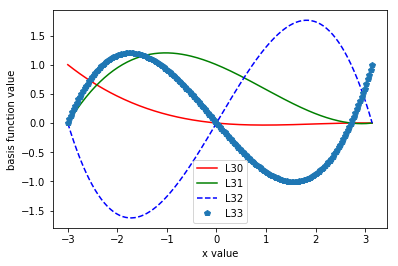

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

# define Lagrange basis function
def L30(x):
    var = -x*(x - math.exp(1.))*(x - math.pi)/3./(3. + math.exp(1.))/(3. + math.pi)
    return var
def L31(x):
    var = (x + 3.)*(x - math.exp(1.))*(x - math.pi)/3./math.pi/math.exp(1.)
    return var
def L32(x):
    var = (x + 3.)*x*(x - math.pi)/(math.exp(1.) + 3.)/math.exp(1.)/(math.exp(1.) - math.pi)
    return var
def L33(x):
    var = (x + 3.)*x*(x -math.exp(1.))/(math.pi + 3.)/math.pi/(math.pi - math.exp(1.))
    return var
# plot figures for three functions
plt.figure(1)
t = np.linspace(-3.,math.pi,201)
plt.plot(t,L30(t),'r',label='L30')
plt.plot(t,L31(t),'g-',label='L31')
plt.plot(t,L32(t),'b--',label='L32')
plt.plot(t,L33(t),'p',label='L33')
plt.legend()
plt.xlabel('x value')
plt.ylabel('basis function value')
plt.show()

## Problem 2
Consider the function $f(x) = ln(x)$

(a) Construct the Lagrange form of the interpolating polynomial for $f$ passing through the points $[1,\;ln1],\;[2,\;ln2]$ and $[3,\;ln3]$.

(b) Plot the polynomial obtained in part (a) on the same set of axes as $f(x) = lnx$. Use an x range of $[1,\;3]$.

(c) Use the polynomial obtained in part (a) to estimate both $ln1.5$ and $ln2.4$. What is the error in each approximation?

(d) Establish the theoretical error bound for using the polynomial found in part (a) to approximate $ln1.5$. Compare theoretical error bound to the error found in part (c).

$\textbf{Solution:}$ 

(a) The Lagrange form of the interpolating polynomial for $f$ is
$$p(x) = L_{20}y_0 + L_{21}y_1 + L_{22}y_2$$
$$L_{20} = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} = \frac{(x - 2)(x - 3)}{2}$$
$$L_{21} = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} = \frac{(x - 1)(x - 3)}{-1}$$
$$L_{22} = \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} = \frac{(x - 1)(x - 2)}{2}$$
Hence, the Lagrange form is given as
$$p(x) = \frac{(x - 2)(x - 3)}{2}ln1 + \frac{(x - 1)(x - 3)}{-1}ln2 + \frac{(x - 1)(x - 2)}{2}ln3$$
(b) Code to generate plots is shown below

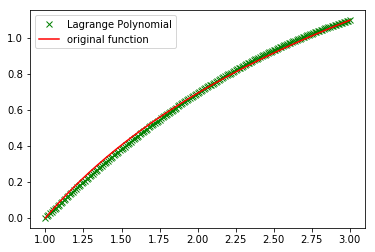

In [3]:
def p2(x):
    var = (x - 2.)*(x - 3.)*np.log(1.)/2. - (x - 1.)*(x - 3.)*np.log(2.) + (x - 1.)*(x - 2.)*np.log(3.)/2.
    return var
def f2(x):
    var = np.log(x)
    return var
plt.figure(2)
t2 = np.linspace(1,3,201)
plt.plot(t2,p2(t2),'gx',label='Lagrange Polynomial')
plt.plot(t2,f2(t2),'r-',label='original function')
plt.legend()
plt.show()

(c) Estimate $ln1.5$ and $ln2.4$

In [4]:
print('The estimate error for ln1.5 and ln2.4 are {0:4.3f} and {1:4.3f} respectively.'\
      .format(p2(1.5),p2(2.4)))
print('The error in each approximation is |ln1.5 - p2(1.5)| = {0:4.3f} and |ln2.4 - p2(2.4)| = {1:4.3f}'\
      .format(abs(f2(1.5)-p2(1.5)),abs(f2(2.4)-p2(2.4))))

The estimate error for ln1.5 and ln2.4 are 0.383 and 0.890 respectively.
The error in each approximation is |ln1.5 - p2(1.5)| = 0.023 and |ln2.4 - p2(2.4)| = 0.014


(d) It can be shown that 
$$f(x) = p(x) + \frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x - x_0)(x - x_1)\cdots(x - x_n)$$
Specifically for this problem, we have theoretical error bound in form of 
$$err \leq \max_{[1,\;3]}|\frac{f^{(3)}(\xi)}{3!}|\cdot \max_{[1,\;3]}|\prod_{i=0}^{2}(x - x_i)| = \frac{1}{3}\times \frac{2\sqrt{3}}{9} = \frac{2\sqrt{3}}{27} = 0.1283$$
The approximated $ln1.5$ is given as
$$ln1.5 = p(1.5) \pm err$$
Compared to the actual error in part (c), theoretical error is indeed an upper bound.

## Problem 3
Use Neville's algorithm to evaluate the interpolating polynomial for $f(x) = sqrt(x)$ that passes through the points $(1,\;sqrt(1)),\;(4,\;sqrt(4))$ and $(16,\;sqrt(16))$, at $x = 9$.

$\textbf{Solution:}$ The evaluated interpolating polynomial using Neville's algorithm is given as
$$P_0 = y_0,\quad P_1 = y_1,\quad P_2 = y_2$$
$$P_{12} = \frac{(x - x_1)P_2 - (x - x_2)P_1}{x_2 - x_1} = \frac{4(x - 4) - 2(x - 16)}{12} = \frac{1}{6}x + \frac{4}{3}$$
$$P_{01} = \frac{(x - x_0)P_1 - (x - x_1)P_0}{x_1 - x_0} = \frac{2(x - 1) - (x - 4)}{3} = \frac{1}{3}x + \frac{2}{3}$$
$$P_{012} = \frac{(x - x_0)P_{12} - (x - x_2)P_{01}}{x_2 - x_0} = \frac{(x - 1)(\frac{1}{6}x + \frac{4}{3}) - (x - 16)(\frac{1}{3}x + \frac{2}{3})}{15} = -\frac{1}{90}x^2 + \frac{7}{18}x + \frac{28}{45}$$
Evaluate the polynomial at $x = 9$, we can get $P_{012}(9) = \frac{29}{9} \approx 3.222$.

## Problem 4
The mean activity coefficient at $25 ^oC$ for silver nitrate, as a function of molality, is given in the table below. Estimate the mean activity coefficient for a molality of $0.032$ and for a molality of $1.682$.

$$\begin{array}
& Molality & 0.005 & 0.010 & 0.020 & 0.050 & 0.100 & 0.200 & 0.500 & 1.000 & 2.000\\
Coefficient & 0.924 & 0.896 & 0.859 & 0.794 & 0.732 & 0.656 & 0.536 & 0.430 & 0.316
\end{array}$$

$\textbf{Solution:}$ The code with Neville's algorithm is shown below

In [5]:
def neville(xx,x,y,n):
    for i in range(n,0,-1):
        for j in range(0,i):
            y[j] = (xx - x[j])*y[j + 1] - (xx - x[n - i + j + 1])*y[j]
            y[j] = y[j]/(x[n - i + j + 1] - x[j])
    return y[0]
xx41 = 0.032
xx42 = 1.682
x4 = np.array([0.005, 0.010, 0.020, 0.050, 0.100, 0.200, 0.500, 1.000, 2.000])
y4 = np.array([0.924, 0.896, 0.859, 0.794, 0.732, 0.656, 0.536, 0.430, 0.316])
yy41 = neville(np.copy(xx41),np.copy(x4),np.copy(y4),8)
yy42 = neville(np.copy(xx42),np.copy(x4),np.copy(y4),8)
print('**ME 581 HW4 Printout**\n')
print('The mean activity coefficient for a molality of 0.032 and 1.682 are {0:4.3f} and {1:4.3f}'\
     .format(yy41,yy42))

**ME 581 HW4 Printout**

The mean activity coefficient for a molality of 0.032 and 1.682 are 0.831 and -216711.827


## Problem 5
Write out the Newton form of the interpolating polynomial for $f(x) = \cos(x)$ that passes through the points $(1,\;\cos(1))$, $(2,\;\cos(2))$ and $(3,\;\cos(3))$.

$\textbf{Solution:}$ We can define the Newton form of interpolating polynomial as
$$p(t) = x_1 + x_2(t - t_1) + x_3(t - t_1)(t - t_2)$$
We have
$$x_1 = y_1 = \cos(1),\quad x_2 = \frac{y_2 - x_1}{t_2 - t_1} = \cos(2) - \cos(1),\quad x_3 = \frac{y_3 - x_1 - x_2(t_3 - t_1)}{(t_3 - t_1)(t_3 - t_2)} = \frac{\cos(1) + \cos(3) - 2\cos(2)}{2}$$
Newton form of interpolating polynomial is given as
$$p(t) = \cos(1) + [\cos(2) - \cos(1)](t - 1) + \frac{\cos(1) + \cos(3) - 2\cos(2)}{2}(t - 1)(t - 2)$$

## Problem 6
The values listed in the table provide the surface tension of mercury as a function of temperature.
$$\begin{array}
& Temperature\;(^oC) & 10 & 25 & 50 & 75 & 100\\
Surface Tension\;(dyn/cm) & 488.55 & 485.48 & 480.36 & 475.23 & 470.11
\end{array}
$$
Use these values to determine the Newton form of the interpolating polynomial, and then use the polynomial to produce a table of surface tension values for temperatures ranging from $5\;^oC$ through $100\;^oC$ in increments of $5\;^oC$. Assess the accuracy of the table by plotting the values from the table and the five given data values on the same set of axes.

$\textbf{Solution:}$ The code used to generate the Newton form of interpolating polynomial is given below, it can be shown from the figure below that the relationship between temperature and surface tension is nearly linear.

**ME 581 HW Printout**

Table of interpolated values
  Temperature    Surface Tension
-------------  -----------------
            5            489.574
           10            488.55
           15            487.526
           20            486.503
           25            485.48
           30            484.457
           35            483.433
           40            482.409
           45            481.385
           50            480.36
           55            479.335
           60            478.309
           65            477.283
           70            476.256
           75            475.23
           80            474.204
           85            473.179
           90            472.154
           95            471.131
          100            470.11


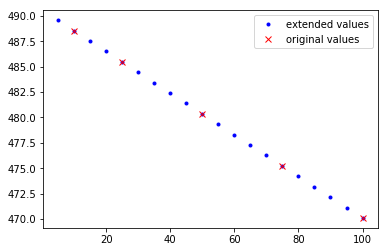

[488.55000000000001, -0.20466666666666622, -3.3333333333489255e-06, -7.179487179452443e-08, 3.168091168085238e-09]


In [21]:
from tabulate import tabulate
def newtonPoly(x_p, y_p):
    ''' x : list of data points
        y : list of f(x)        '''
    n = len(x_p)
    c = []
    for i in range(n):
        c.append(y_p[i])
    # Determing the coefficents
    for k in range(1, n):
        for i in range(n-1, k-1, -1):
            c[i] = float(c[i] - c[i-1])/float(x_p[i] - x_p[i-k])

    # Builds the polynomial from coefficents and x values
    def P(x):
        poly = 0
        for i in range(n):
            temp = 0
            temp += c[i]
            if i > 0:
                for k in range(i, 0, -1):
                    temp *= (x-x_p[k-1])
            poly += temp
        return poly

    return c,P

x6 = np.array([10, 25, 50, 75, 100])
y6 = np.array([488.55, 485.48, 480.36, 475.23, 470.11])
c6,p6 = newtonPoly(np.copy(x6),np.copy(y6))
print('**ME 581 HW Printout**\n')
print('Table of interpolated values')
xx6 = np.arange(5,101,5)
st6 = np.zeros(len(xx6))
tab6 = []
for i6,tp6 in enumerate(xx6):
    st6[i6] = p6(tp6)
    tab6.append([tp6, st6[i6]])
print(tabulate(tab6,headers=['Temperature','Surface Tension']))
plt.figure(3)
plt.plot(xx6,st6,'b.',label='extended values')
plt.plot(x6,y6,'rx',label='original values')
plt.legend()
plt.show()
print(c6)

## Problem 7 
The thermal conductivity of air as a function of temperature is given in the table below. Estimate the thermal conductivity of air when $T = 240$ K and $T = 485$ K, using the Newton form of the interpolating polynomial.
$$\begin{array}
& Temperature\;(K) & 100 & 200 & 300 & 400 & 500 & 600\\
Thermal\;Conductivity\;(mW/m\cdot k)& 9.4 & 18.4 & 26.2 & 33.3 & 39.7 & 45.7
\end{array}$$

$\textbf{Solution:}$ The interpolated Newton form of polynomial is generated below

In [22]:
x7 = np.array([100, 200, 300, 400, 500, 600])
y7 = np.array([9.4, 18.4, 26.2, 33.3, 39.7,45.7])
c7,p7 = newtonPoly(np.copy(x7),np.copy(y7))
print('**ME 581 HW Printout**\n')
print(c7)
print(p7(240),' ', p7(485))


**ME 581 HW Printout**

[9.4000000000000004, 0.08999999999999998, -5.9999999999999846e-05, 8.333333333333224e-08, -2.0833333333332597e-10, 6.666666666666312e-13]
21.6154816   38.7813758219


Using Newton form of interpolating polynomial, we get the estimated thermal conductivity when $T = 240$ K is $21.6154816$ mW/m.k, when $T = 485$ K is $38.7813758219$ mW/m.k